### Importing Basic Libraries

Basic libraries like Numpy, Pandas, Maptplotlib and Scikit-learn to load the datasets will be imported here.

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

In [44]:
data=load_breast_cancer()

In [45]:
cancer_features=pd.DataFrame(data.data,columns=data.feature_names)
cancer_features.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [46]:
li_classes = [data.target_names[1], data.target_names[0]]
print(li_classes)

['benign', 'malignant']


### Converting Categorical Data features to numerical features

In [47]:
## Label encoding using the LabelEncoder of Scikit-learn

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Converting the data type of the variables to pandas series
target_series = pd.Series(data.target)
target = le.fit_transform(target_series)

print(target[:10])

[0 0 0 0 0 0 0 0 0 0]


### Checking for null values

In [48]:
cancer_features.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

### Checking for outliers using Inter Quartile Range (IQR)

In [49]:
for i in cancer_features.columns:
    
    col = cancer_features[i]
    
    q75, q25 = np.percentile(col, [75 ,25])
    
    iqr = q75 - q25
    
    print(iqr,'-----')
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print(i,"------",type(i))
    
    anomaly = []
    
    for k in range(len(col)):
        if (int(col[k]) > max_val) or (int(col[k])< min_val):
            anomaly.append(col[k])
            
    print("Total Samples in the outlier zone = ",len(anomaly))

4.08 -----
mean radius ------ <class 'str'>
Total Samples in the outlier zone =  14
5.629999999999999 -----
mean texture ------ <class 'str'>
Total Samples in the outlier zone =  5
28.929999999999993 -----
mean perimeter ------ <class 'str'>
Total Samples in the outlier zone =  13
362.40000000000003 -----
mean area ------ <class 'str'>
Total Samples in the outlier zone =  25
0.018930000000000002 -----
mean smoothness ------ <class 'str'>
Total Samples in the outlier zone =  569
0.06547999999999998 -----
mean compactness ------ <class 'str'>
Total Samples in the outlier zone =  0
0.10114000000000001 -----
mean concavity ------ <class 'str'>
Total Samples in the outlier zone =  0
0.053689999999999995 -----
mean concave points ------ <class 'str'>
Total Samples in the outlier zone =  0
0.033800000000000024 -----
mean symmetry ------ <class 'str'>
Total Samples in the outlier zone =  569
0.008419999999999997 -----
mean fractal dimension ------ <class 'str'>
Total Samples in the outlier zon

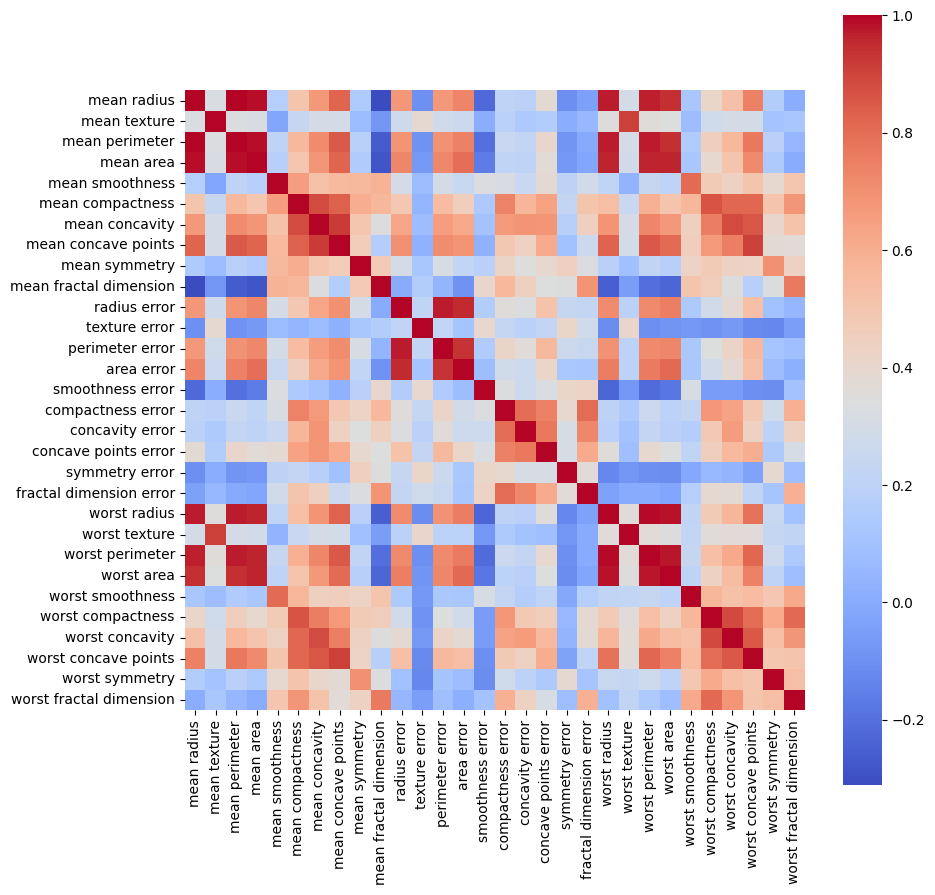

In [50]:
#------feature selection---------

import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cancer_features.corr(), square=True, cmap='coolwarm')
plt.show()

### Using the property of Random Forest Classifier to see the effect of each feature on model development

Please wait for a while here as it will take some time to give the plot. Also the columns would be very near and visibility will be affected.

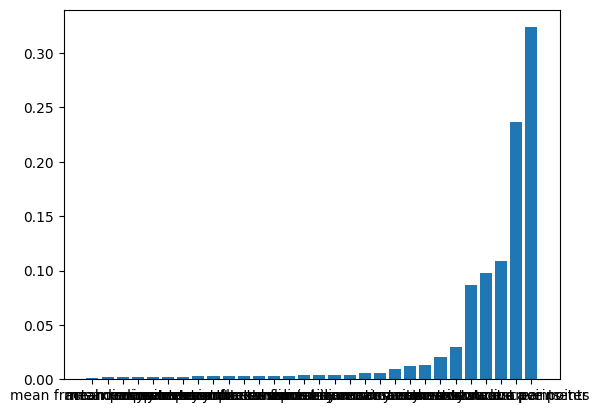

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=1300)
rfr.fit(cancer_features,target)

importance=rfr.feature_importances_
importance_df=pd.DataFrame({"Features": cancer_features.columns,"Importance": importance})
importance_df=importance_df.sort_values("Importance")

plt.bar(importance_df["Features"],importance_df["Importance"])
plt.show()

#### After analysing correlation matrix and random forest regression result we found that droping some features will not affect our model and will make our model lighter

In [52]:
cancer_features=cancer_features.drop(['mean perimeter','mean area','mean radius','mean compactness'],axis=1)

### Feature scaling: Standardizing the data features

In [53]:
from sklearn.preprocessing import StandardScaler

STD = StandardScaler()
cancer_features=STD.fit_transform(cancer_features)

### Feature Reduction

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
fit = pca.fit(cancer_features)
cancer_features = pca.transform(cancer_features)

print("Reduced Feature Size: ", cancer_features.shape)

Reduced Feature Size:  (569, 10)


### Splitting Dataset into the Train and Test sets and in the ratio of 70:30 using the Scikit-Learn function 

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(cancer_features,target,test_size=0.3,random_state=0)

print("Train Data Shape: ", x_train.shape)
print("Train Target Shape: ", y_train.shape)
print("Test Data Shape: ", x_test.shape)
print("Test Target Shape: ", y_test.shape)

Train Data Shape:  (398, 10)
Train Target Shape:  (398,)
Test Data Shape:  (171, 10)
Test Target Shape:  (171,)


### Training the Support Vector Classifier Model

In [56]:
from sklearn.svm import SVC

model=SVC(C=1.2,kernel='rbf')

model.fit(x_train,y_train)

SVC(C=1.2)

### Predicting the performance of the trained model on the test data

In [57]:
y_pred = model.predict(x_test)

### Evaluating the performance of the trained model on the test data by using Accuracy, Precision, Recall, F1-Score and AUC numbers

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

print("accuracy: ", accuracy_score(y_test, y_pred)*100, "%")
print("precision: ", precision_score(y_test, y_pred)) 
print("recall: ", recall_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))
print("area under curve (auc): ", roc_auc_score(y_test, y_pred))

accuracy:  98.83040935672514 %
precision:  0.9907407407407407
recall:  0.9907407407407407
f1:  0.9907407407407407
area under curve (auc):  0.9874338624338626
